In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./connections.txt', delimiter=' ')
df.columns = ["from", "to"]
df.head()

from  to
0     0   2
1     0   3
2     0   4
3     0   5
4     0   6

### 1. Create a Directed graph  

In [3]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(df.to_numpy())

### 2. Show which nodes are bridges. 

In [5]:
import networkx as nx

# Assuming you have created your directed graph
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(df.to_numpy())

# Function to find articulation points
def find_articulation_points(graph):
    articulation_points = set()

    for node in graph.nodes():
        temp_graph = graph.copy()
        temp_graph.remove_node(node)

        # Check if the removal of the node increases the number of connected components
        num_components_after_removal = nx.number_strongly_connected_components(temp_graph)

        if num_components_after_removal > 1:
            articulation_points.add(node)

    return articulation_points

# Find articulation points
articulation_points = find_articulation_points(directed_graph)

print("Articulation points (Bridge Nodes):", articulation_points)


KeyboardInterrupt: 

### 3. Show the density of the graph. Comment about your findings  


In [42]:
density = nx.density(directed_graph)
print("Graph Density:", density)

Graph Density: 0.005409920437693852


### 4. Show which nodes have the highest and lowest number of connections.   
### 5. Show which nodes have the highest incoming and outgoing connections  


In [69]:
import networkx as nx
import pandas as pd

# Assuming you have created your directed graph
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(df.to_numpy())

# Calculate in-degrees and out-degrees
in_degrees = directed_graph.in_degree()
out_degrees = directed_graph.out_degree()

# Convert DegreeView to dictionary
in_degrees_dict = dict(in_degrees)
out_degrees_dict = dict(out_degrees)

# Find nodes with the top 5 highest and lowest in-degrees
top_5_highest_in_degrees = sorted(in_degrees_dict, key=in_degrees_dict.get, reverse=True)[:5]
top_5_lowest_in_degrees = sorted(in_degrees_dict, key=in_degrees_dict.get)[:5]


# Find nodes with the top 5 highest and lowest out-degrees
top_5_highest_out_degrees = sorted(out_degrees_dict, key=out_degrees_dict.get, reverse=True)[:5]
top_5_lowest_out_degrees = sorted(out_degrees_dict, key=out_degrees_dict.get)[:5]


# Calculate total degrees (in + out)
total_degrees_dict = {node: in_degrees_dict.get(node, 0) + out_degrees_dict.get(node, 0) for node in directed_graph.nodes()}

# Find nodes with the top 5 highest total degrees
top_5_highest_total_degrees = sorted(total_degrees_dict, key=total_degrees_dict.get, reverse=True)[:5]


# Find nodes with the top 5 lowest total degrees
top_5_lowest_total_degrees = sorted(total_degrees_dict, key=total_degrees_dict.get)[:5]




In [70]:
# Print the results in a nicer way

def print_node_results(title, nodes):
    print(f"{title}:")
    for i, node in enumerate(nodes, start=1):
        print(f"{i}. Node {node} - {'Total Degrees:' if 'total' in title.lower() else 'In-Degrees:'} {total_degrees_dict.get(node, 0) if 'total' in title.lower() else in_degrees_dict.get(node, 0)}")
    print("\n")

# Print in-degrees
print_node_results("Top 5 Nodes with the Highest In-Degrees", top_5_highest_in_degrees)
print_node_results("Top 5 Nodes with the Lowest In-Degrees", top_5_lowest_in_degrees)

# Print out-degrees
print_node_results("Top 5 Nodes with the Highest Out-Degrees", top_5_highest_out_degrees)
print_node_results("Top 5 Nodes with the Lowest Out-Degrees", top_5_lowest_out_degrees)

# Print total degrees
print_node_results("Top 5 Nodes with the Highest Total Degrees", top_5_highest_total_degrees)
print_node_results("Top 5 Nodes with the Lowest Total Degrees", top_5_lowest_total_degrees)

Top 5 Nodes with the Highest In-Degrees:
1. Node 1888 - In-Degrees: 251
2. Node 2543 - In-Degrees: 246
3. Node 1800 - In-Degrees: 216
4. Node 2611 - In-Degrees: 197
5. Node 1827 - In-Degrees: 186


Top 5 Nodes with the Lowest In-Degrees:
1. Node 0 - In-Degrees: 0
2. Node 1 - In-Degrees: 0
3. Node 686 - In-Degrees: 0
4. Node 2 - In-Degrees: 1
5. Node 3 - In-Degrees: 1


Top 5 Nodes with the Highest Out-Degrees:
1. Node 107 - In-Degrees: 2
2. Node 1684 - In-Degrees: 14
3. Node 1912 - In-Degrees: 7
4. Node 3437 - In-Degrees: 5
5. Node 0 - In-Degrees: 0


Top 5 Nodes with the Lowest Out-Degrees:
1. Node 11 - In-Degrees: 1
2. Node 12 - In-Degrees: 1
3. Node 15 - In-Degrees: 1
4. Node 18 - In-Degrees: 1
5. Node 37 - In-Degrees: 1


Top 5 Nodes with the Highest Total Degrees:
1. Node 107 - Total Degrees: 1045
2. Node 1684 - Total Degrees: 792
3. Node 1912 - Total Degrees: 755
4. Node 3437 - Total Degrees: 547
5. Node 0 - Total Degrees: 346


Top 5 Nodes with the Lowest Total Degrees:
1. Node 

### 6. Show which nodes have the highest closeness, betweenness, and eigenvector | 
Interpret your findings   

In [71]:
# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(directed_graph)
betweenness_centrality = nx.betweenness_centrality(directed_graph)
eigenvector_centrality = nx.eigenvector_centrality(directed_graph, max_iter=500)

# Find nodes with the highest closeness centrality
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)

# Find nodes with the highest betweenness centrality
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Find nodes with the highest eigenvector centrality
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)


In [72]:
def print_centrality_results(title, centrality_dict):
    print(f"{title}:")
    sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)[:5]
    
    for i, node in enumerate(sorted_nodes, start=1):
        print(f"{i}. Node {node} - {title} Centrality: {centrality_dict.get(node):.4f}")
    
    print("\n")

# Print top 5 nodes for each centrality measure
print_centrality_results("Closeness", closeness_centrality)
print_centrality_results("Betweenness", betweenness_centrality)
print_centrality_results("Eigenvector", eigenvector_centrality)


Closeness:
1. Node 2642 - Closeness Centrality: 0.1180
2. Node 2649 - Closeness Centrality: 0.1179
3. Node 2629 - Closeness Centrality: 0.1163
4. Node 2643 - Closeness Centrality: 0.1159
5. Node 2543 - Closeness Centrality: 0.1159


Betweenness:
1. Node 1684 - Betweenness Centrality: 0.0330
2. Node 1912 - Betweenness Centrality: 0.0271
3. Node 1718 - Betweenness Centrality: 0.0266
4. Node 563 - Betweenness Centrality: 0.0130
5. Node 1405 - Betweenness Centrality: 0.0101


Eigenvector:
1. Node 2655 - Eigenvector Centrality: 0.8027
2. Node 2654 - Eigenvector Centrality: 0.4799
3. Node 2646 - Eigenvector Centrality: 0.2276
4. Node 2638 - Eigenvector Centrality: 0.1782
5. Node 2631 - Eigenvector Centrality: 0.1669




### Closeness Centrality:
Closeness centrality measures how quickly a node can reach other nodes in the network. In this case:
- Node 2642 has the highest closeness centrality (0.1180), indicating it is, on average, the most reachable node in the network.
- Nodes 2649, 2629, 2643, and 2543 also have high closeness centrality, suggesting they are well-connected and can efficiently interact with other nodes.

### Betweenness Centrality:
Betweenness centrality identifies nodes that act as bridges between different parts of the network. Here:
- Node 1684 has the highest betweenness centrality (0.0330), indicating its importance as a bridge for information flow between other nodes.
- Nodes 1912, 1718, 563, and 1405 also play significant roles in connecting different parts of the network.

### Eigenvector Centrality:
Eigenvector centrality considers a node's connections to other well-connected nodes. Here:
- Node 2655 has the highest eigenvector centrality (0.8027), suggesting it is connected to other nodes that are themselves well-connected.
- Nodes 2654, 2646, 2638, and 2631 also have high eigenvector centrality, indicating their influence in the network.

These centrality measures provide insights into different aspects of node importance within the network. Closeness centrality highlights nodes that are central for quick information transfer, betweenness centrality identifies key bridges, and eigenvector centrality emphasizes nodes connected to other influential nodes.


### 7. Implement a community detection algorithm on the directed graph and show how many communities were created.  
### 8. Show the largest and the smallest community. | Interpret your findings  

In [4]:
# Detect communities using the Louvain method
communities = list(greedy_modularity_communities(directed_graph))

# Print the number of communities and their sizes
print(f"Number of communities: {len(communities)}")
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {len(community)} nodes")

# Find the largest and smallest communities
largest_community = max(communities, key=len)
smallest_community = min(communities, key=len)

# Print the sizes of the largest and smallest communities
print(f"Largest Community: Size {len(largest_community)} nodes")
print(f"Smallest Community: Size {len(smallest_community)} nodes")


Number of communities: 11
Community 1: 1001 nodes
Community 2: 753 nodes
Community 3: 747 nodes
Community 4: 542 nodes
Community 5: 363 nodes
Community 6: 314 nodes
Community 7: 208 nodes
Community 8: 59 nodes
Community 9: 38 nodes
Community 10: 8 nodes
Community 11: 6 nodes
Largest Community: Size 1001 nodes
Smallest Community: Size 6 nodes


### 7. Community Detection:

The network has been divided into 11 communities. Each community represents a group of nodes with distinct patterns of connections.

### 8. Interpretation of Communities:

- **Largest Community (Community 1):**
  - **Interpretation:** Broad and Densely Connected
  - The largest community, with 1001 nodes, indicates a broad and densely connected subset. Nodes in this community are likely to have numerous interactions, suggesting a general and well-connected group within the network.

- **Smallest Community (Community 11):**
  - **Interpretation:** Niche and Specialized
  - The smallest community, with only 6 nodes, represents a more niche and specialized subset. Nodes in this community have fewer connections, suggesting a distinct subgroup with specific characteristics or functions within the network.

These findings reveal the structural diversity within the network, ranging from broad and interconnected groups to more specialized and isolated subsets.


### 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.  

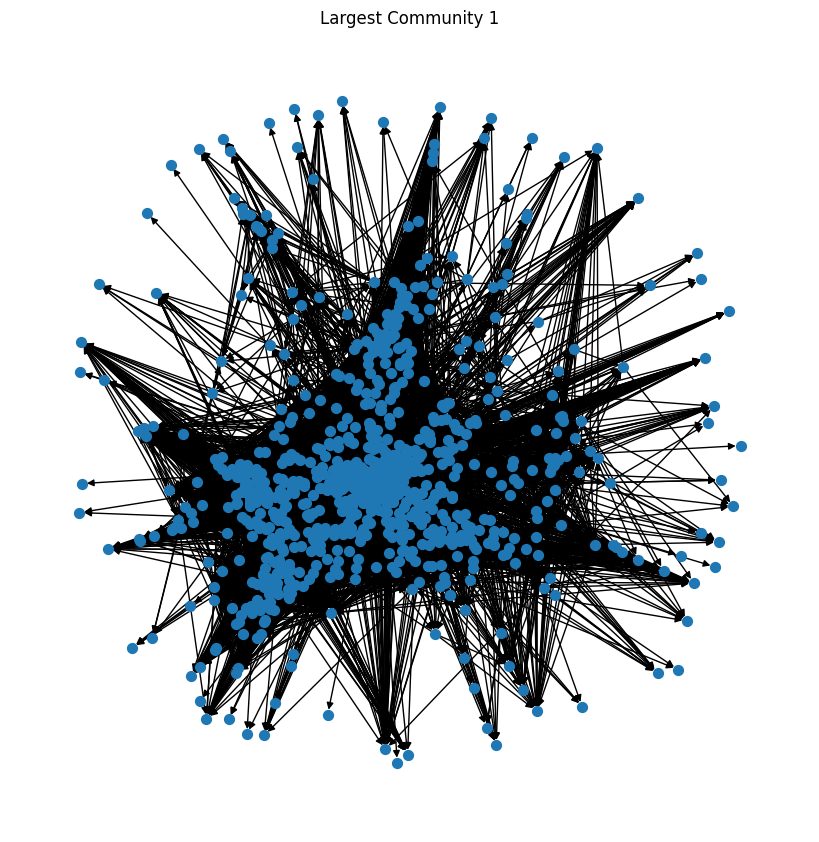

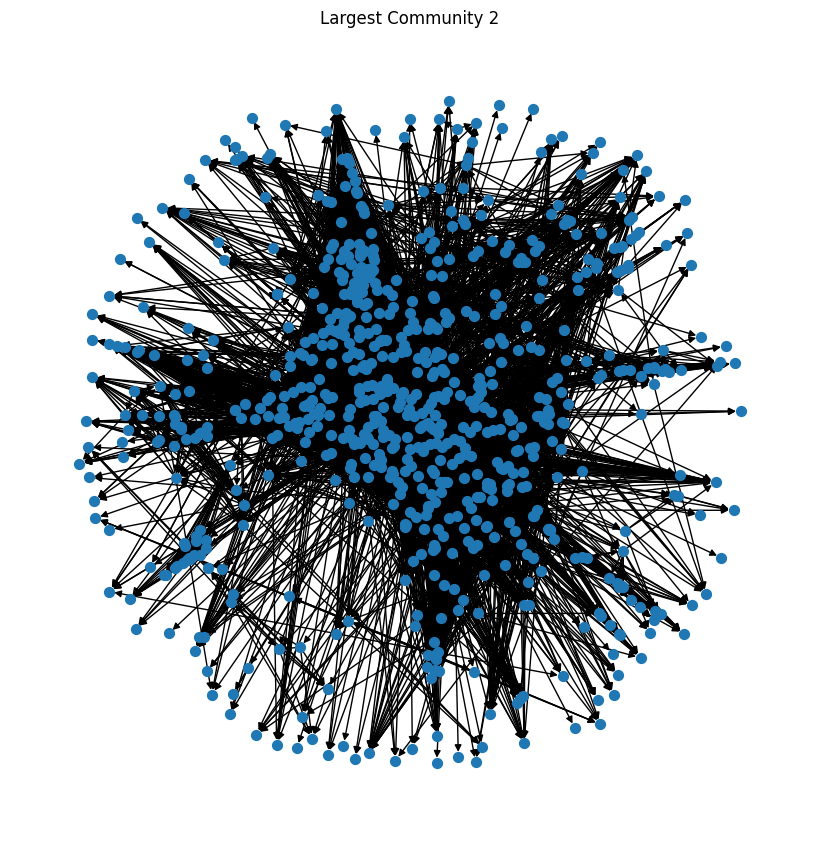

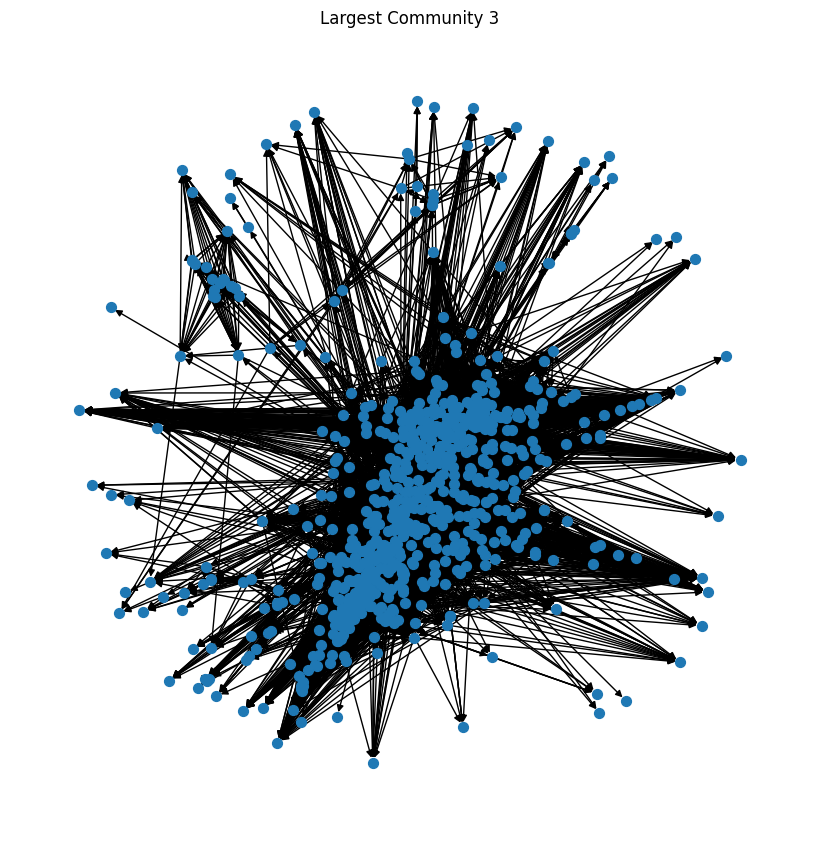

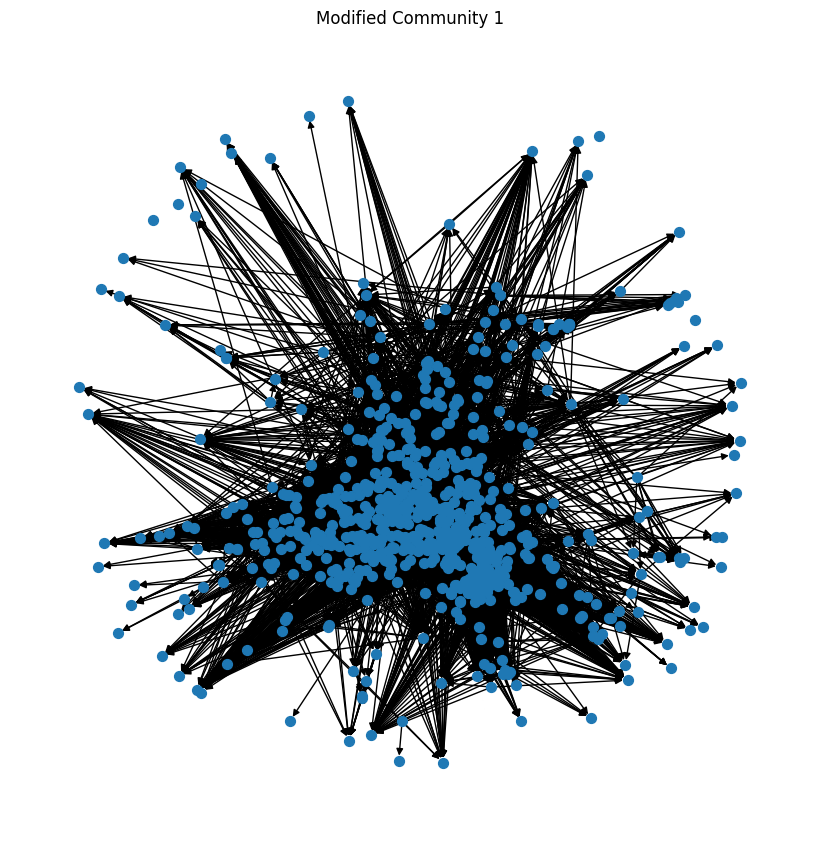

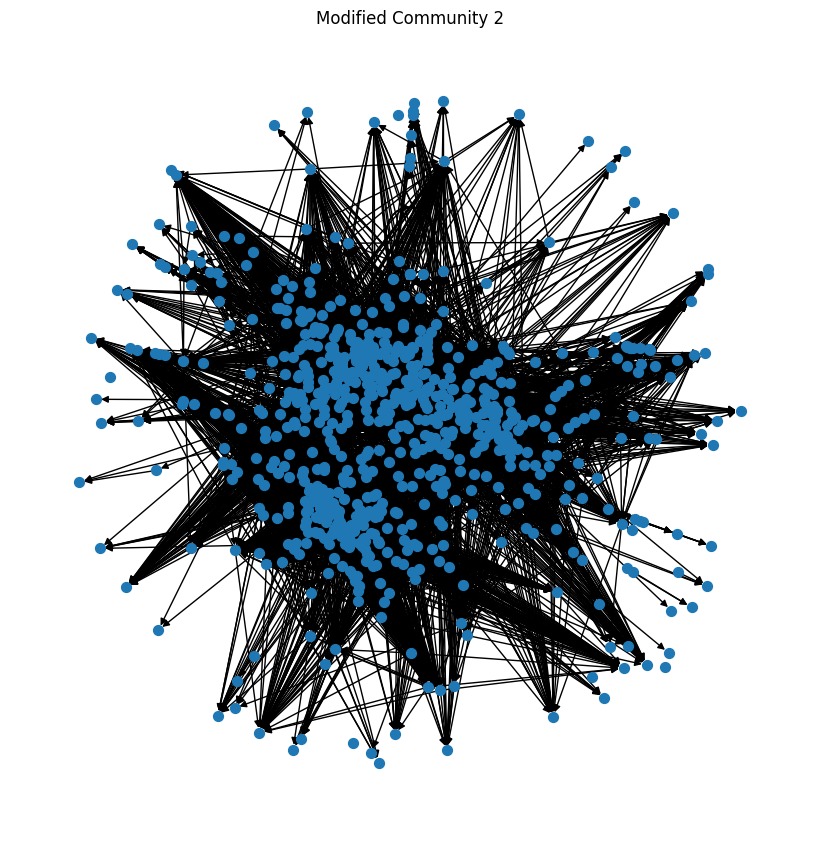

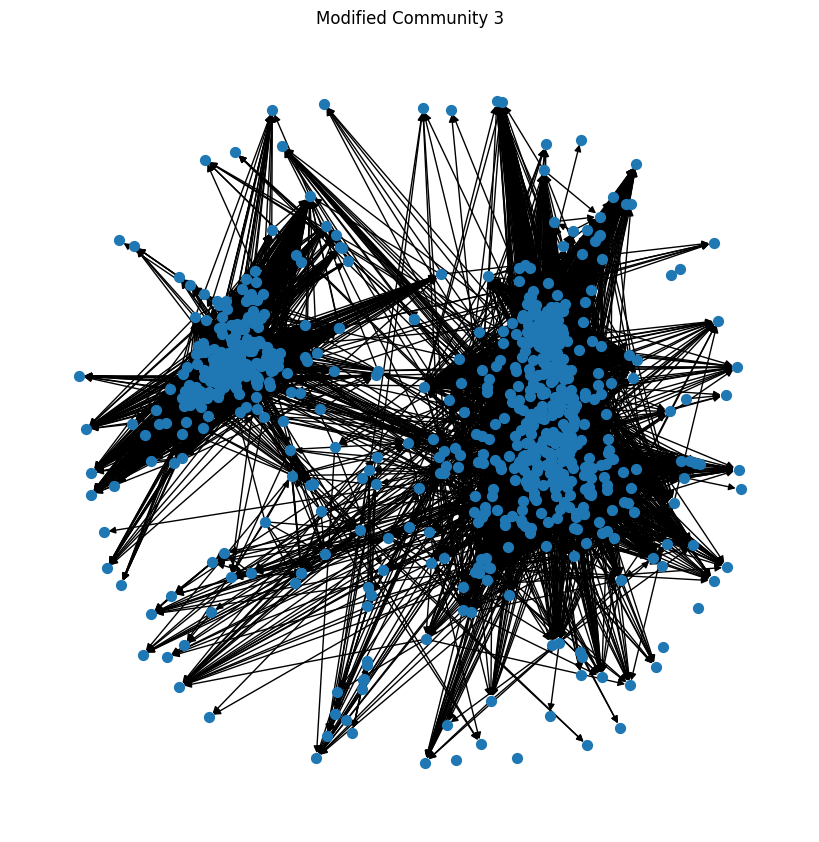

In [7]:
import matplotlib.pyplot as plt
import heapq

# Select the largest three communities
largest_communities = heapq.nlargest(3, communities, key=len)

# Draw the largest three communities
for i, community in enumerate(largest_communities, start=1):
    subgraph = directed_graph.subgraph(community)
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=False, node_size=50)
    plt.title(f"Largest Community {i}")
    plt.show()

# Define a function to remove top nodes by centrality measure
def remove_top_nodes(graph, centrality_measure, k=3):
    top_nodes = heapq.nlargest(k, centrality_measure, key=centrality_measure.get)
    graph.remove_nodes_from(top_nodes)

# Remove top 3 nodes by centrality measures for each community
for i, community in enumerate(largest_communities, start=1):
    # Create a copy of the subgraph for modifications
    subgraph_copy = subgraph.copy()

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(subgraph_copy)
    closeness_centrality = nx.closeness_centrality(subgraph_copy)
    betweenness_centrality = nx.betweenness_centrality(subgraph_copy)
    eigenvector_centrality = nx.eigenvector_centrality(subgraph_copy, max_iter=1000, tol=1e-6)

    # Remove top 3 nodes by each centrality measure
    remove_top_nodes(subgraph_copy, degree_centrality)
    remove_top_nodes(subgraph_copy, closeness_centrality)
    remove_top_nodes(subgraph_copy, betweenness_centrality)
    remove_top_nodes(subgraph_copy, eigenvector_centrality)

    # Draw the modified community
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(subgraph_copy)
    nx.draw(subgraph_copy, pos, with_labels=False, node_size=50)
    plt.title(f"Modified Community {i}")
    plt.show()



### 10. Draw the influencers of those top 3 communities.   


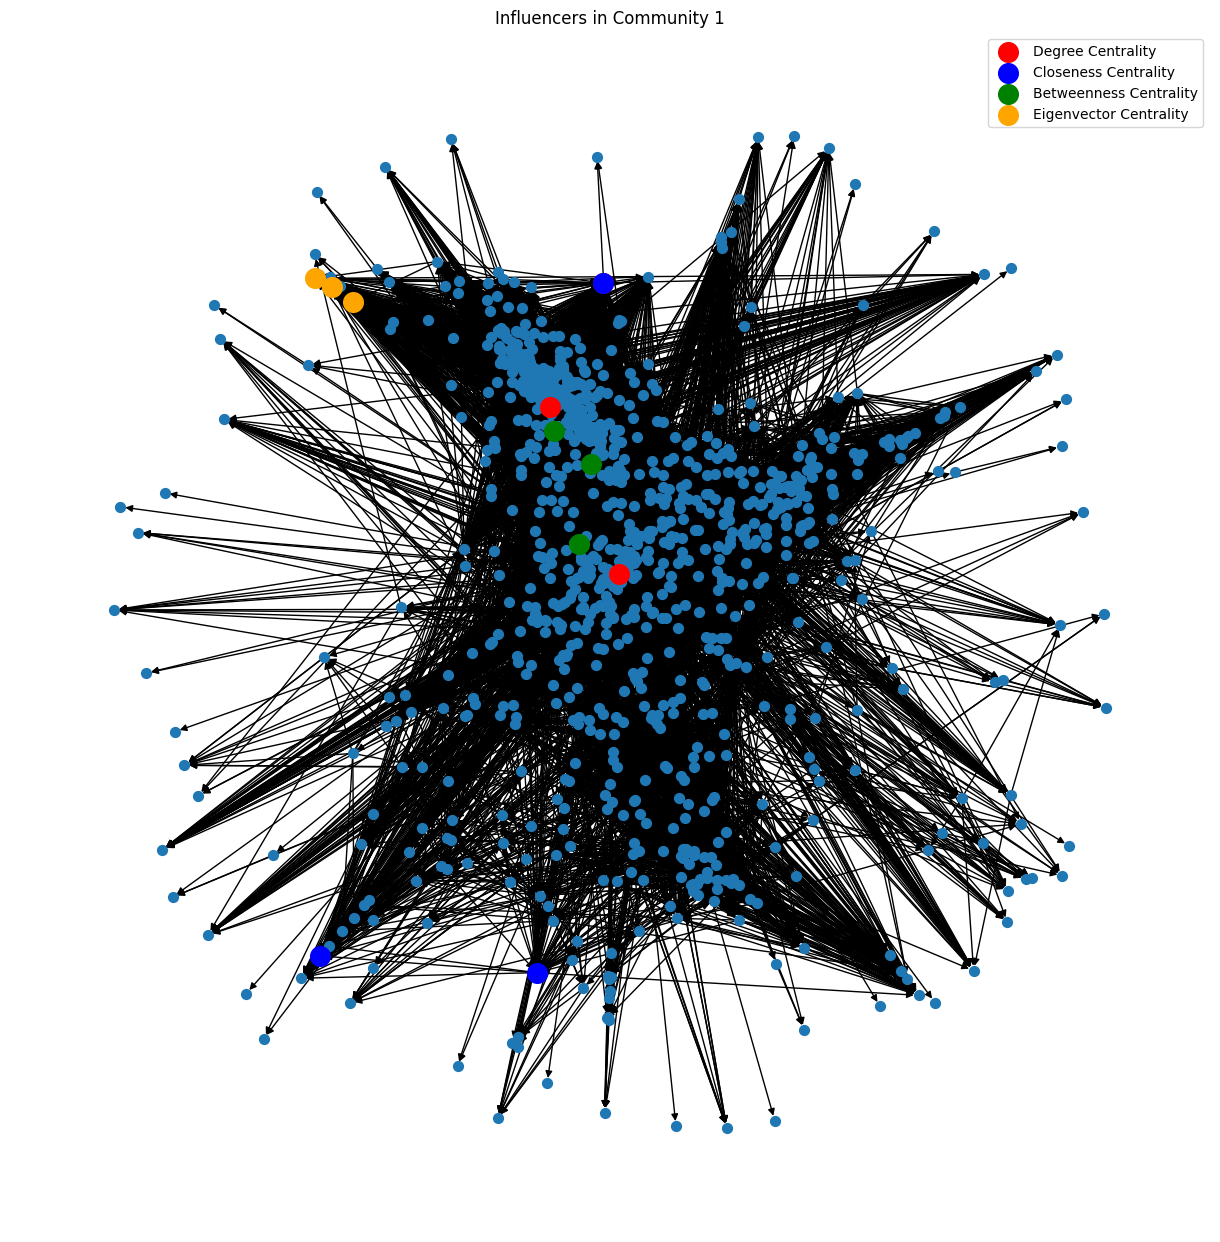

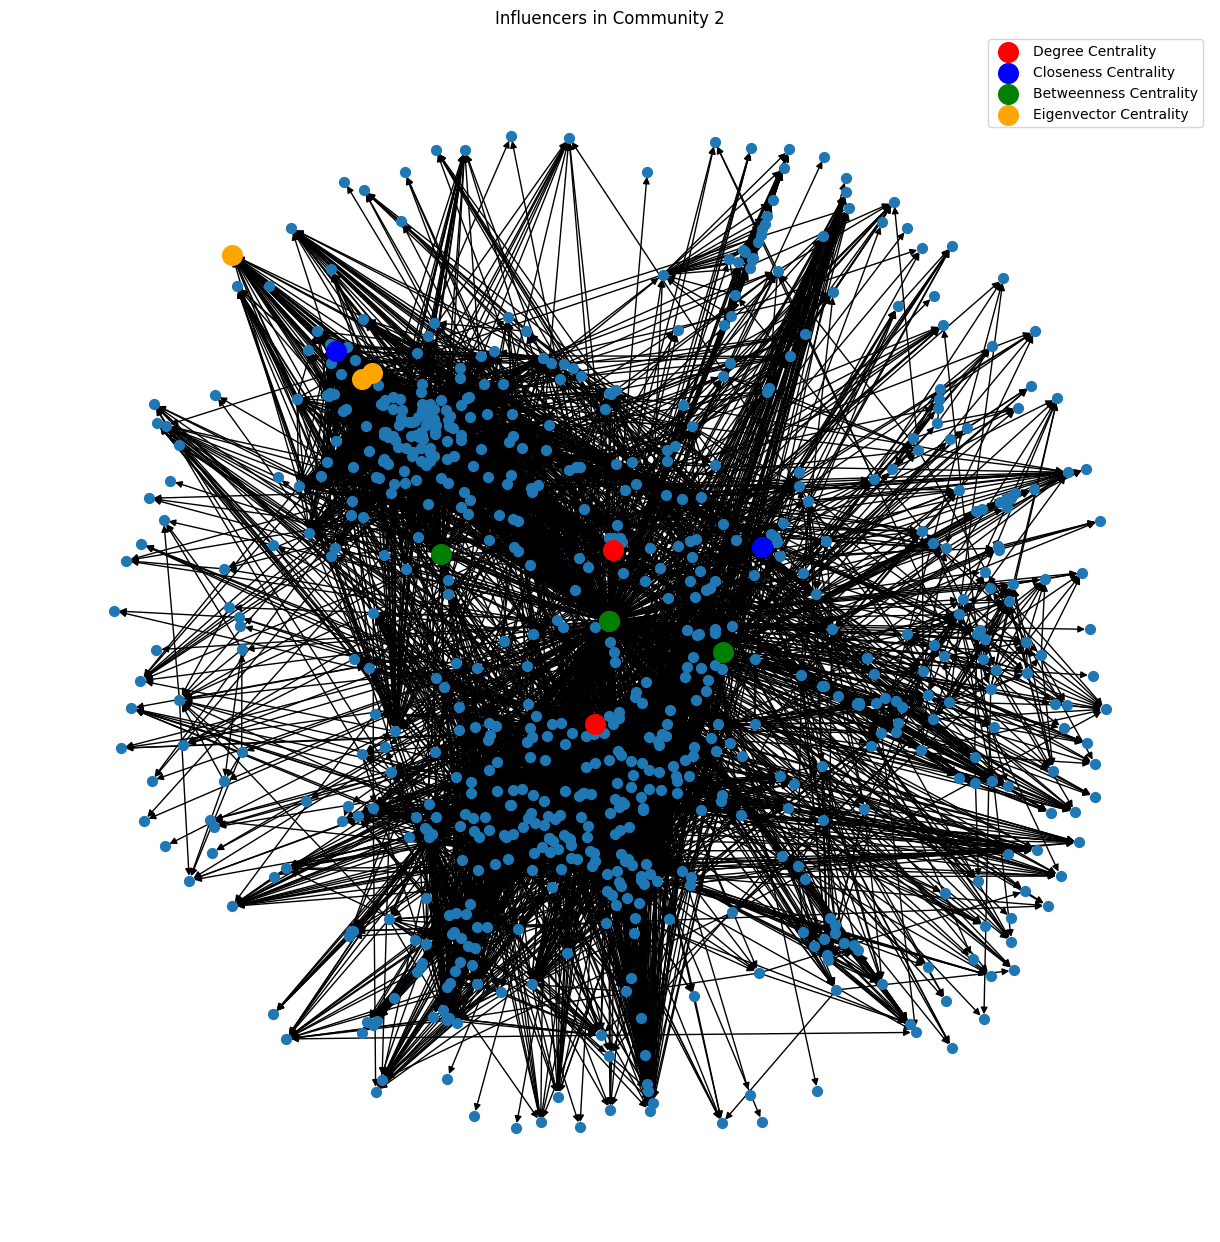

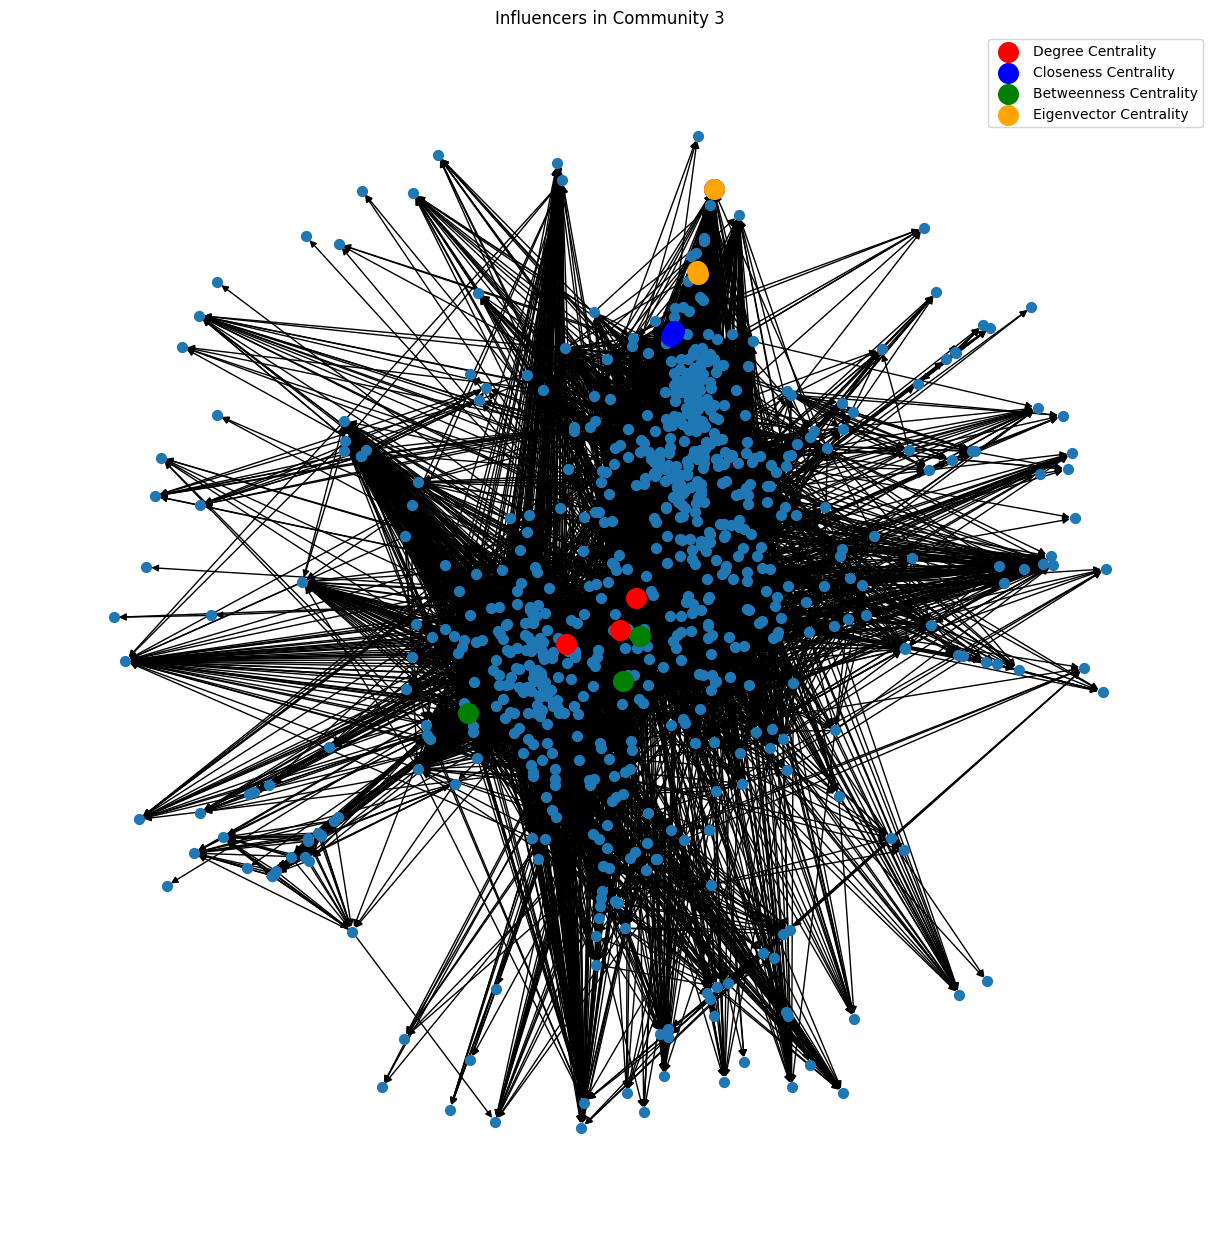

In [9]:
# Draw the influencers of the top 3 communities
for i, community in enumerate(largest_communities, start=1):
    subgraph = directed_graph.subgraph(community)
    
    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000, tol=1e-6)

    # Identify influencers for each centrality measure
    influencers_degree = heapq.nlargest(3, degree_centrality, key=degree_centrality.get)
    influencers_closeness = heapq.nlargest(3, closeness_centrality, key=closeness_centrality.get)
    influencers_betweenness = heapq.nlargest(3, betweenness_centrality, key=betweenness_centrality.get)
    influencers_eigenvector = heapq.nlargest(3, eigenvector_centrality, key=eigenvector_centrality.get)

    # Draw the influencers
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(subgraph)

    # Draw the community
    nx.draw(subgraph, pos, with_labels=False, node_size=50)

    # Highlight the influencers
    nx.draw_networkx_nodes(subgraph, pos, nodelist=influencers_degree, node_color='red', node_size=200, label='Degree Centrality')
    nx.draw_networkx_nodes(subgraph, pos, nodelist=influencers_closeness, node_color='blue', node_size=200, label='Closeness Centrality')
    nx.draw_networkx_nodes(subgraph, pos, nodelist=influencers_betweenness, node_color='green', node_size=200, label='Betweenness Centrality')
    nx.draw_networkx_nodes(subgraph, pos, nodelist=influencers_eigenvector, node_color='orange', node_size=200, label='Eigenvector Centrality')

    plt.title(f"Influencers in Community {i}")
    plt.legend()
    plt.show()


# 11. Action Plan

## a. Hypothetical Business (Telecom, Marketing Agency, etc.)

For the purpose of this action plan, let's consider a hypothetical **Telecom Company**.

## b. Hypothetical Marketing Budget

Assuming a hypothetical marketing budget of **$1,000,000**.

## c. Hypothetical Cost Per Action (Advertisement Cost)

Let's set a hypothetical cost per action, or advertisement cost, at **$0.50 per click**.

## d. Target Audience Decision

### Targeting Based on Network Analysis:

Utilizing the insights gained from the network analysis, the telecom company can strategically target its marketing efforts. Here are some recommendations:

1. **Target the Largest Community:**
   - Allocate a significant portion of the budget to target the largest community (Community 1).
   - Nodes in this community are well-connected, making it an effective and broad audience for telecom services.

2. **Niche Targeting - Smallest Community:**
   - Allocate a smaller portion of the budget to target the smallest community (Community 11).
   - While small, this community represents a niche and specialized group. Tailor marketing messages to address specific needs or preferences.

3. **Influencer Marketing:**
   - Identify and collaborate with influencers within the top 3 communities.
   - Focus on influencers based on different centrality measures (Degree Centrality, Closeness Centrality, Betweenness Centrality, Eigenvector Centrality).

### Marketing Channels:

1. **Online Platforms:**
   - Utilize online platforms to reach the diverse audience within the largest community.
   - Collaborate with influencers for sponsored content.

2. **Specialized Campaigns:**
   - Run specialized campaigns for the smallest community, addressing their specific interests or requirements.

3. **Influencer Collaborations:**
   - Leverage influencers identified through centrality measures for targeted marketing.

### Monitoring and Adjustments:

1. **Track Engagement:**
   - Monitor the performance of campaigns in terms of engagement and click-through rates.

2. **Iterative Strategy:**
   - Adjust the strategy based on real-time analytics.
   - Allocate more budget to channels or communities showing higher engagement.

3. **Evaluate Influencer Impact:**
   - Evaluate the impact of influencer collaborations and adjust partnerships accordingly.

### Conclusion:

By strategically allocating the marketing budget based on network analysis insights, the telecom company can optimize its outreach efforts, ensuring a balance between broad audience targeting and niche engagement. Continuous monitoring and flexibility in the strategy will be key to maximizing the effectiveness of the marketing campaign.
